In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
%cd /Users/dane/src/fitbit

df=pd.read_csv('fb1415_long.csv')
df1415 = df[(df.date>='2014-01-01') & (df.date<='2015-12-31')]
dfw=df1415.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
df1 = dfw[['biking_dane','steps_dane','steps_cindy', 'temp','humid','calories_dane', 'calories_cindy', 'weight_cindy','weight_dane']].convert_objects(convert_numeric=True)
dfw.columns

/Users/dane/src/fitbit


Index(['Travel', 'biking_dane', 'calories_cindy', 'calories_dane',
       'conditions', 'distance_cindy', 'distance_dane', 'humid', 'rain',
       'steps_cindy', 'steps_dane', 'temp', 'weight_cindy', 'weight_dane',
       'wind'],
      dtype='object', name='variable')

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


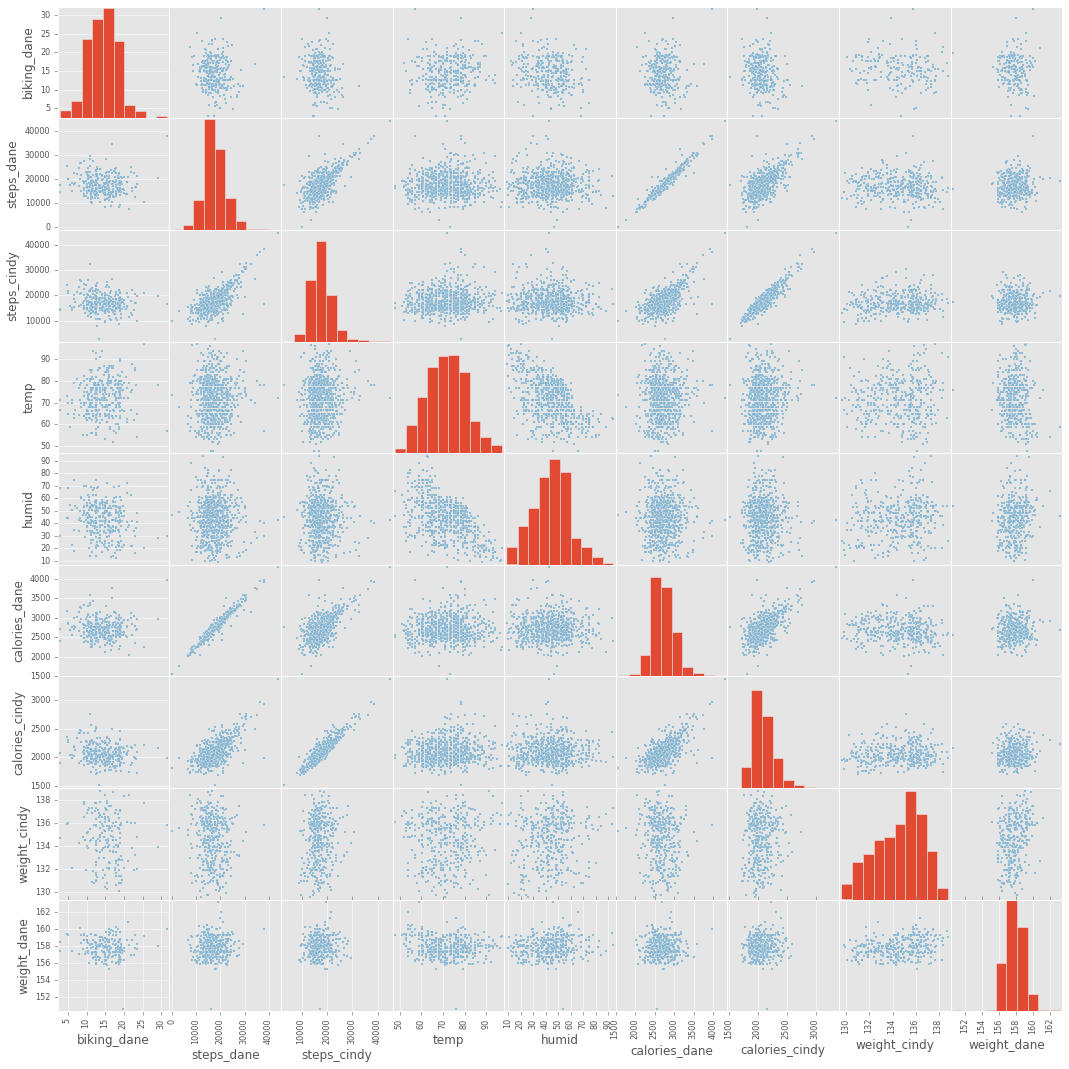

In [2]:
scatter_matrix(df1, alpha=0.8, figsize=(18, 18))
plt.show()

In [6]:
df45 = df[(df.date>='2014-01-01') & (df.date<='2015-12-31')]

In [7]:
df45w=df45.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
df45w.dtypes

variable
Travel             object
biking_dane       float64
calories_cindy      int64
calories_dane       int64
conditions         object
distance_cindy    float64
distance_dane     float64
humid             float64
rain              float64
steps_cindy         int64
steps_dane          int64
temp              float64
weight_cindy      float64
weight_dane       float64
wind              float64
dtype: object

In [8]:
df45w['dt'] = df45w.index
df45w.index=pd.to_datetime(df45w.dt,format='%Y-%m-%d')
df45w.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', 
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='dt', length=730, freq=None, tz=None)

In [49]:
dfm = pd.groupby(df45w,by=[df45w.index.year, df45w.index.month])

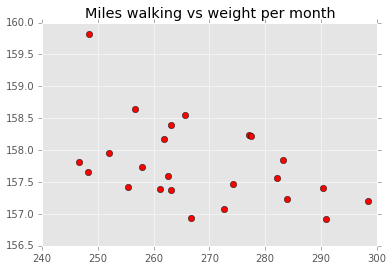

In [67]:
plt.plot(dfm.steps_dane.sum()/2000.,dfm.weight_dane.mean(),'bo')
plt.title('Miles walking vs weight per month')
plt.show()

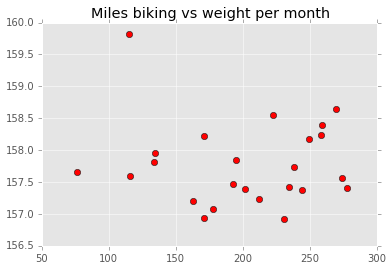

In [68]:
plt.plot(dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Miles biking vs weight per month')
plt.show()

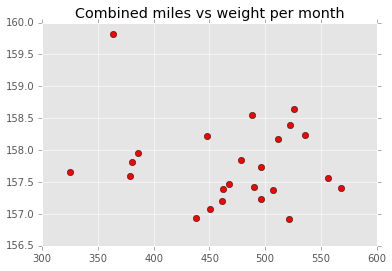

In [72]:
plt.plot(dfm.steps_dane.sum()/2000.+dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Combined miles vs weight per month')
plt.show()

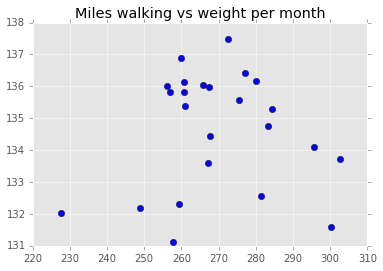

In [102]:
plt.plot(dfm.steps_cindy.sum()/2000.,dfm.weight_cindy.mean(),'ro')
plt.title('Miles walking vs weight per month')
plt.show()

In [43]:
df45w['goalmet_cindy'] = np.where(df45w['steps_cindy'] > 14000,1,-1)
df45w['goalmet_dane'] = np.where(df45w['steps_dane'] > 14000,1,-1)


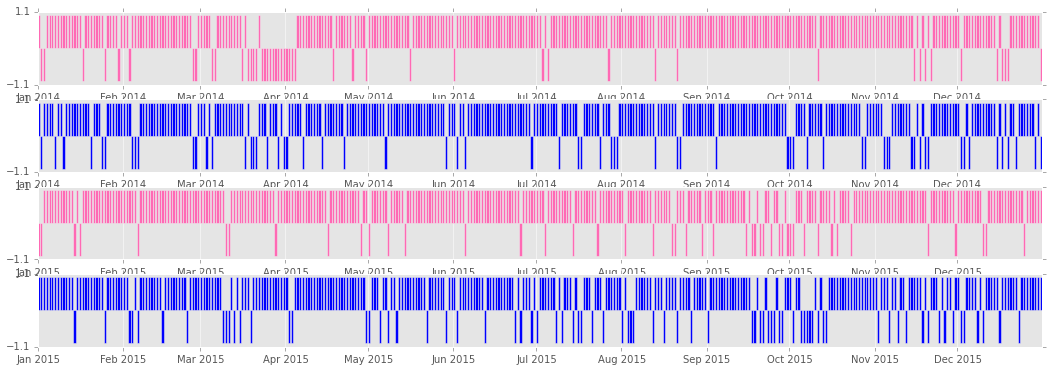

In [44]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
dfp = df45w[df45w.index < '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(412)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.subplot(413)
dfp = df45w[df45w.index >= '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(414)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.show()

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


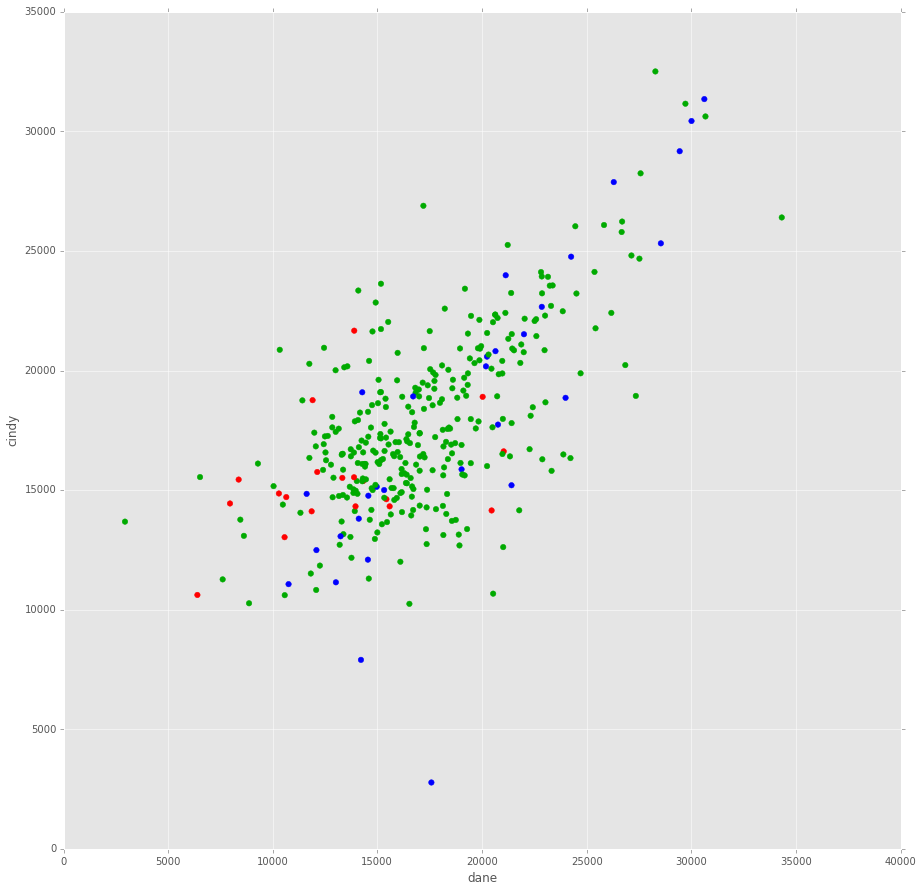

In [32]:
fig = plt.gcf()
fig.set_size_inches(15,15)
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000) & (df45w.index>'2015-01-01')]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.xlabel('dane')
plt.ylabel('cindy')


In [17]:
df45w.ix[df45w.Travel=='Work', 'color'] = '#FF0000'
df45w.ix[pd.isnull(df45w.Travel), 'color'] = '#00AA00'
df45w.ix[df45w.Travel=='Vacation', 'color'] = '#0000FF'
df45w.head(30)

variable,Travel,biking_dane,calories_cindy,calories_dane,conditions,distance_cindy,distance_dane,humid,rain,steps_cindy,steps_dane,temp,weight_cindy,weight_dane,wind,dt,color
dt,,,,,,,,,,,,,,,,,
2014-01-01,NaN,22.7,2001,3034,Mostly Cloudy,6.60,11.09,34,0,14112,22658,62.1,131.9,156.9,1.0,2014-01-01,#00AA00
2014-01-02,NaN,NaN,1849,2409,Scattered Clouds,5.99,6.30,32,0,12719,12866,64.9,132.6,157.5,1.0,2014-01-02,#00AA00
2014-01-03,NaN,15.9,1879,2860,Mostly Cloudy,6.17,9.91,30,0,13238,20246,64.0,132.0,157.4,6.9,2014-01-03,#00AA00
2014-01-04,NaN,NaN,2003,3009,Partly Cloudy,7.32,11.08,32,0,16058,22623,66.0,NaN,157.4,4.6,2014-01-04,#00AA00
2014-01-05,NaN,20.0,2164,2581,Partly Cloudy,7.77,7.59,23,0,16599,15503,66.0,132.1,157.4,1.0,2014-01-05,#00AA00
2014-01-06,NaN,NaN,2079,2691,Mostly Cloudy,8.77,8.43,35,0,18790,17225,61.0,131.7,157.1,5.8,2014-01-06,#00AA00
2014-01-07,NaN,NaN,2036,2555,Scattered Clouds,8.07,6.84,37,0,17651,13967,62.1,131.9,156.7,4.6,2014-01-07,#00AA00
2014-01-08,NaN,NaN,1925,2510,Mostly Cloudy,6.72,7.20,67,0,14306,14524,57.9,NaN,NaN,8.1,2014-01-08,#00AA00
2014-01-09,NaN,18.8,2083,3018,Mostly Cloudy,8.53,10.88,70,0,18295,22223,57.9,130.8,156.4,6.9,2014-01-09,#00AA00


In [49]:
dfp.goalmet_cindy.value_counts()

 1    319
-1     46
dtype: int64